# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [11]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

/home/alfonso/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (2.4225868480797215, 0.2978118332264803)
1    (7.857044946096414, 0.019672718061171098)
2     (0.3657100310219531, 0.8328889029556509)
3     (0.2194037202706973, 0.8961012589825068)
4    (0.42184254291513273, 0.8098378217228923)
dtype: object

#### Interpret the normaltest results and make your observations.

# Explain the test results here
===================================================================

_Website def:
This function tests the null hypothesis that a sample comes from 
a normal distribution. It is based on D’Agostino and Pearson’s test 
that combines skew and kurtosis to produce an 
omnibus test of normality._



**Therefore, we can conclude as higher is pvalue, higher is likelihood that the same doesn't comes from a normal distribution and as lower is pvalue, higher is likelihood that the same comes from a normal distribution**

===================================================================

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

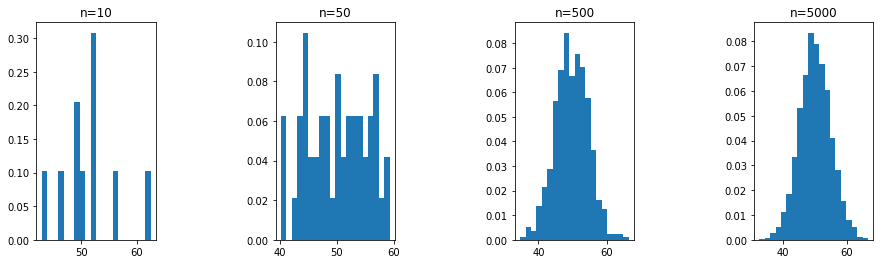

In [3]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here

==================================================================

We can conclude that as higher is the sample (10 50, 500 and 5000) more symetric and normalized is the sample. In fact, it increases exponentially.

==================================================================

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

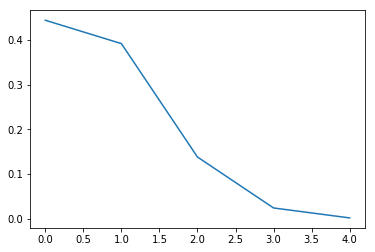

In [4]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

# Your comment here

=========================================================================

The y axis shows the sum of the probability of the five people.

The x axis shows the the likelihood of all people clicks on the ad.

=========================================================================

#### Now plot PMP with 50, 500, and 5000 visitors.

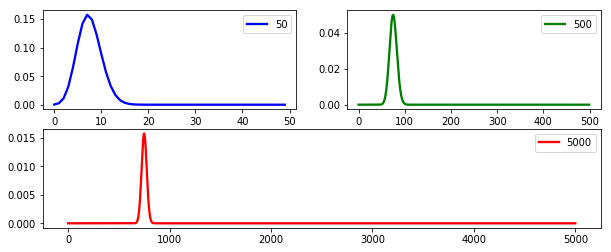

In [15]:
# Your code here
n = 50

p = 0.15

x1 = range(n)

dist = binom(n, p)

gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10,4))
plt.subplot(gs[0, 0])
plt.plot(x1, dist.pmf(x1), '-', color="b", linewidth=2.3, label='50')
plt.legend()

m = 500

x2 = range(m)

dist = binom(m, p)

plt.subplot(gs[0, 1])
plt.plot(x2, dist.pmf(x2), '-', color="g", linewidth=2.3, label='500')
plt.legend()

l = 5000

x3 = range(l)

dist = binom(l, p)

plt.subplot(gs[1, :])
plt.plot(x3, dist.pmf(x3), '-', color="r", linewidth=2.3, label='5000')
plt.legend()


plt.show()

#### What did you notice from the distribution plots? Comment your findings.

# Your comment here

I find that the likelihood of all people clicks on the ad tends to zero. At the beginning, it reaches its highest 
chance. However, after 10% of people it decreases abruptly and tends to zero.


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

###### Your comment here

==============================================================

The Poisson distribution gets specialized in events that happen rarely or with low likelihood

==============================================================

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

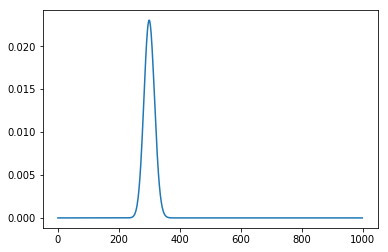

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)